In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import ast

In [2]:
def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]


def getnormalizerd(df):
    normalized_df=(df-df.min())/(df.max()-df.min())
    return normalized_df

In [3]:
jet = getnormalizerd(pd.read_csv('../JET/JET_OUT/scores_2D.csv',index_col='Model').iloc[:,1:]).add_suffix('_jet')

In [4]:
high = getnormalizerd(pd.read_csv('../HIGH/HIGH_OUT/scores_2D.csv',index_col='model').iloc[:,1:]).add_suffix('_high')

In [5]:
front = getnormalizerd(pd.read_csv('../FRONT/FRONT_OUT/scores_1981.csv',index_col='model').iloc[:,0:1]).add_suffix('_front')

In [6]:
df = pd.DataFrame(jet['score_jet']).join(pd.DataFrame(high['score_high'])).join(pd.DataFrame(front['Score_Native_front']))

In [7]:
df = df.rename(columns={'score_jet':'jet','Score_2deg_high':'high','Score_Native_front':'front'})

In [8]:
df = df.sort_values('jet').dropna()

In [9]:
df = df.T[['MIROC-ESM-CHEM',
 'BNU-ESM',
 'CNRM-CM5',
 'IPSL-CM5A-MR',
 'IPSL-CM5A-LR',
 'GFDL-ESM2M',
 'GFDL-ESM2G',
 'GFDL-CM3',
 'bcc-csm1-1-m',
 'bcc-csm1-1',
 'ACCESS1-3',
 'ACCESS1-0',
 'NOAA',
 'ERA5',
 'MRI-ESM1',
 'MRI-CGCM3',
 'MIROC5']].T

In [10]:
df = df.drop(['NOAA'])#,'ERA5'])

In [11]:
file = open("../genealogy/Knutti_colours_dict.txt", "r")
contents = file.read()
knutti_dic = ast.literal_eval(contents)
file.close()

In [12]:
cols = [knutti_dic[index] for index in df.index]

In [13]:
df['sum'] = getnormalizerd(df.sum(1))

In [14]:
df = getnormalizerd(df)

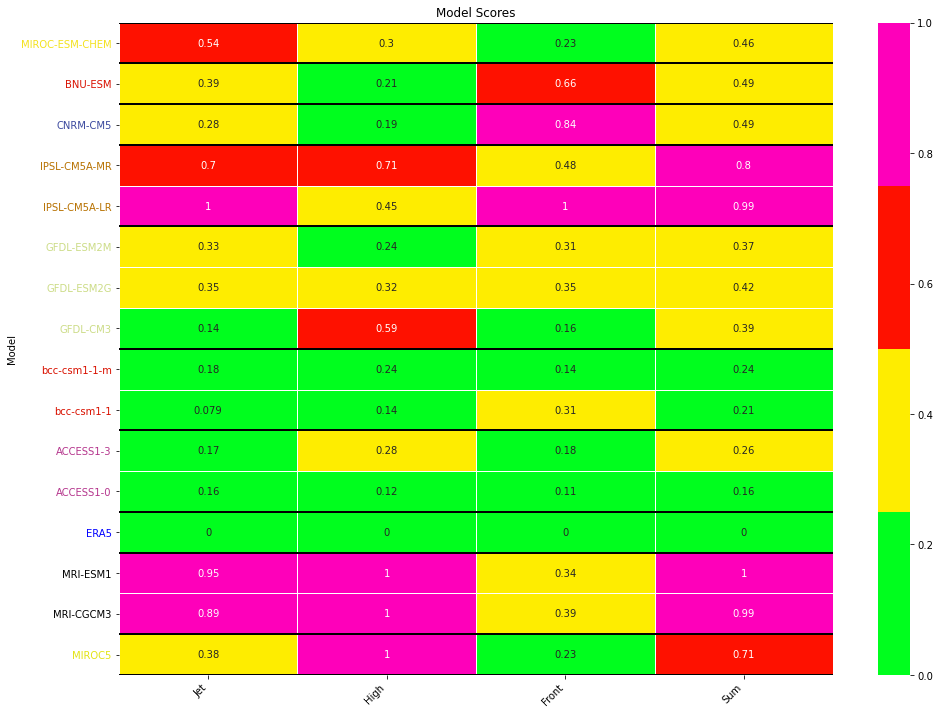

In [17]:

#hex_list = ["00ff1e","00ff1e","ffee00","ff1100","ff00bb"]
hex_list = ["00ff1e","ffee00","ff1100","ff00bb"]
cmap = [rgb_to_dec(hex_to_rgb(hex)) for hex in hex_list]

f, ax = plt.subplots(figsize=(16,12))
map = sns.heatmap(df.round(3),cmap=cmap, annot=True, linewidths=.5, ax=ax, xticklabels=1, yticklabels=1,cbar=True)
map.set_xticklabels(['Jet','High','Front','Sum'],rotation=45,horizontalalignment='right')


ax = plt.gca()
ylbls = ax.get_ymajorticklabels()
num=-1
for lbl in ylbls:
    num+=1
    lbl.set_color(cols[num])

ax.hlines([0,1,2,3,5,8,10,12,13,15,16], *ax.get_xlim(),color = 'black',linewidth=2.0)

plt.title('Model Scores')
plt.savefig('Scores_heatmap.pdf')
plt.savefig('Scores_heatmap.png')
plt.show()


In [18]:
df.to_csv('results.csv')

In [19]:
['MIROC-ESM-CHEM',
 'BNU-ESM',
 'CNRM-CM5',
 'IPSL-CM5A-MR',
 'IPSL-CM5A-LR',
 'GFDL-ESM2M',
 'GFDL-ESM2G',
 'GFDL-CM3',
 'bcc-csm1-1-m',
 'bcc-csm1-1',
 'ACCESS1-3',
 'ACCESS1-0',
 'NOAA',
 'ERA5',
 'MRI-ESM1',
 'MRI-CGCM3',
 'MIROC5']

['MIROC-ESM-CHEM',
 'BNU-ESM',
 'CNRM-CM5',
 'IPSL-CM5A-MR',
 'IPSL-CM5A-LR',
 'GFDL-ESM2M',
 'GFDL-ESM2G',
 'GFDL-CM3',
 'bcc-csm1-1-m',
 'bcc-csm1-1',
 'ACCESS1-3',
 'ACCESS1-0',
 'NOAA',
 'ERA5',
 'MRI-ESM1',
 'MRI-CGCM3',
 'MIROC5']

In [20]:
col_dic={}
for model in df.index:
    if df['sum'][model] < 0.25:
        col_dic[model] = "#00ff1e" #green realistic
    elif df['sum'][model] < 0.5:
        col_dic[model] = "#ffee00" #yellow - bias
    elif df['sum'][model] < 0.75:
        col_dic[model] = "#ff1100" #red - significantly bias
    else:
        col_dic[model] = "#ff00bb" #purple unrealistic

In [21]:
pickle.dump(col_dic, open( "col_dic.p", "wb" ))